导入 MNIST 数据（第三章中介绍），把它切分进一个训练集，一个验证集，和一个测试集（例如 40000 个实例进行训练，10000 个进行验证，10000 个进行测试）。然后训练多个分类器，例如一个随机森林分类器，一个 Extra-Tree 分类器和一个 SVM。接下来，尝试将它们组合成集成，使用软或硬投票分类器来胜过验证集上的所有集合。一旦找到了，就在测试集上实验。与单个分类器相比，它的性能有多好？

(70000, 784)

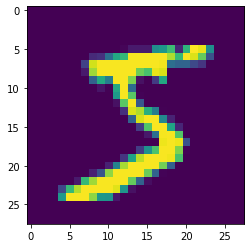

In [102]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
data=fetch_openml('mnist_784')
Xraw,yraw=data['data'],data['target']
plt.imshow(Xraw[0].reshape(28,28))
Xraw.shape

In [112]:
X=Xraw
y=np.array(yraw,dtype='int32')

array([5, 0, 4, ..., 4, 5, 6])

In [113]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:50000], X[5000:6000], X[60000:], y[:50000], y[5000:6000], y[60000:]

In [114]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
clf1=RandomForestClassifier()
clf2=ExtraTreesClassifier()
clf3=SVC()

In [115]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import expon, reciprocal
params1={
    'n_estimators':[100,200,500],
    'max_leaf_nodes':[8,16,32,64],
    'n_jobs':[-1]
}

params2={
    'n_estimators':[100,200,500],
    'max_leaf_nodes':[8,16,32,64],
    'n_jobs':[-1]
}

params3={
    'kernel':['linear','rbf'],
    'C':[0.1,0.5,1,5,10],
    'gamma':[0.1,1,2,5]
}

params33={
    'kernel':['linear'],
    'C':[1]
}

In [116]:
from sklearn.model_selection import cross_val_score,cross_val_predict
# print(cross_val_score(clf1,X_train,y_train))
# array([0.9674, 0.9642, 0.9615, 0.965 , 0.9619])
cross_val_score(clf1,X_val,y_val),cross_val_score(clf2,X_val,y_val)

(array([0.865, 0.855, 0.905, 0.86 , 0.88 ]),
 array([0.875, 0.88 , 0.93 , 0.875, 0.93 ]))

In [117]:
# grid_search3=GridSearchCV(clf3,params33,cv=5,verbose=3,n_jobs=-1)
# grid_search3.fit(X_train,y_train)

# grid_search2=GridSearch(clf2,params2,cv=5,verbose=3,n_jobs=-1,random_state=42)
# grid_search2.fit(X_train,y_train)
# grid_search1=GridSearch(clf1,params1,cv=5,verbose=3,n_jobs=-1,random_state=42)
# grid_search1.fit(X_train,y_train)

In [118]:
clf11=RandomForestClassifier()
clf22=ExtraTreesClassifier()
clf33=SVC()

In [36]:
clf33.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf33.score(X_train,y_train)

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
clf44=GradientBoostingClassifier(n_estimators=10)
print(clf44)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [120]:
clf44.fit(X_train,y=y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
clf44.score(X_val,y_val)

0.858

In [51]:
from sklearn.ensemble import VotingClassifier
vot=VotingClassifier(estimators=[('11',clf11),('22',clf22),('44',clf44)],voting='hard',n_jobs=-1)
vot.fit(X_train,y_train)

NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
def mystacking(clfs,X,y):
    n=len(clfs)
    Y=[]
    for clf in clfs:
        try:
            y_pred=clf.transform(X)
            Y.append(y_pred)
        except:
            Y.append([clf.transform])

In [54]:
clf11.fit(X_train,y_train)
clf22.fit(X_train,y_train)
# clf44.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [56]:
y1=clf11.predict(X_train)
y2=clf22.predict(X_train)
y4=clf44.predict(X_train)

In [77]:
yy_train=np.array([[y1[i],y2[i],y4[i]] for i in range(len(y1))])

In [78]:
from sklearn.base import BaseEstimator

In [79]:
y_train.shape,yy_train.shape

((50000,), (50000, 3))

In [88]:
yy_train[0]

array(['5', '5', '5'], dtype='<U1')

In [84]:
from sklearn.linear_model import LogisticRegression
stacking=LogisticRegression(max_iter=200)
stacking.fit(X=yy_train,y=y_train)

D:\zhengjing\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
stacking.predict(yy_train)

D:\zhengjing\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:268: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')